<a href="https://colab.research.google.com/github/Modequick/Machine-Learning-Project/blob/main/Skripsi_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



#new
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [159]:
dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")

df = dataset_df
dataset_df.head()


df

<ipython-input-159-19715adb34a4>:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")


,profile_id,order_id,accom_id,room_id,accom_chain_name,selling_price_idr,gbv_idr,coupon_idr,sales_date_utc7,sales_timestamp,...,next_category_1,next_category_2,next_category_3,next_latest_sentiment_analysis,next_room_type,next_bed_type,next_room_size_inmeter,count_buy_that_day,count_buy_that_month,count_buy_that_next_day
0,ET0LCvUlRKbtFLscAFkCi/WWLLw=,HCcNAiyXSymMGRQkSqzAAtFlMxc=,Uz+MOvMFoXZMCkmixPFGgpTm9lU=,L6H56k4Rou+RiVAeX2QFwrv6xwY=,NaN,5.249279e+05,5.705797e+05,0,2018-09-22,2018-09-22 09:35:41.027 UTC,...,NaN,NaN,NaN,NaN,DELUXE,ONE_DOUBLE_BED,NaN,2,7,1
1,exoQ3kUraPU4wFlzPkk5+ykBwTs=,sRDgi4iW3och3ZkFvI/7aW1P3xY=,PMJIaKNhV02UjxNiev3Ltce2kNQ=,h10O5X/RJjDGNa+4oSVmxZBhplQ=,iCwYKECg554FmWkZKOS6O7I8nXA=,8.530683e+05,7.218379e+05,0,2018-09-22,2018-09-22 03:16:16.417 UTC,...,NaN,NaN,NaN,NaN,NaN,KING,25.0,2,4,1
2,9GuIvtbdJFVdHFM/0x1p345wCwM=,xlSmSKB3tahvfYZ1DEq0Zu3nek0=,Y4UBm0bDkNkWK2JWpzmbJTlQLqc=,lqSNqRT0DKCxUC60BE3jFG5BwNQ=,NaN,1.926132e+05,1.889571e+05,0,2018-09-22,2018-09-22 01:28:14.882 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED,18.5,2,4,1
3,QXB7Zobjy0aW6Q8SYt8DQD7fSrQ=,3d4xj1dEU8Q1tSY2APAxmcjlwFw=,TxJe7ItZLbtw1K8Aqlem51jNvaE=,P+HWuys1viVCcm4/aqWuEJ91tb0=,cCnyuGlSTM26W1cOgCNhFiEe+R8=,3.003773e+05,4.044809e+05,0,2018-09-22,2018-09-22 22:09:32.201 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED_OR_TWO_SINGLE_B,26.0,2,4,1
4,UVEV2qykZPJQ/kfd20M2/86qKrM=,Qnf6/o5tErU5iMEiwzkWhFfiIjc=,kneU7W4rjhdyr4nKoVOP17bfaVk=,wmCmvcyYOxvDtr5DADgjj48ClEs=,HIwm7tZAAnF5sNurgy85MraVTB0=,2.257385e+05,2.310196e+05,0,2018-09-22,2018-09-22 15:08:32.967 UTC,...,NaN,NaN,NaN,NaN,DOUBLE,ONE_DOUBLE_BED,16.0,2,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18965,PGHZcysItzfsRIiWBex9lWMkFkU=,xysTpLyQC4XCr/ufA7SbzWLp2ac=,+1MQ9tdCFkoWJIMgIrMYmMDkiK8=,hS/LL4WbIy0byuh+xac1HeQXrXg=,cCnyuGlSTM26W1cOgCNhFiEe+R8=,2.527474e+05,2.227864e+05,0,2018-12-10,2018-12-10 16:48:26.499 UTC,...,NaN,NaN,NaN,NaN,SUPERIOR,QUEEN,18.0,1,10,1
18966,Z9LE0DbTQL+jHZsuEomLIhOjbAw=,1CdenGjgvmlBhfbqg5ABokCsvUM=,Uvn0XPSPQ4pBsDOaLOAgBuOUYFc=,/PWP+w24URGk23s+zAtQkpQIL4Q=,iPx9ZoFSImNCsrB2j118fF4hd+8=,1.074395e+06,1.071035e+06,0,2018-12-10,2018-12-10 18:22:29.538 UTC,...,NaN,NaN,NaN,NaN,DOUBLE,ONE_DOUBLE_BED,32.0,2,9,1
18967,cXNc4lz3P4Ni7hltvo+nZrAfpP8=,CMY7d/6TOoB+kFZtg2I/1Jg4dws=,dhHtr5ULFkp7fWIjqcI7X/HO8So=,wT+bpz01UnhDecpjTfJWuHmO4fw=,NaN,2.119371e+05,1.597081e+05,0,2018-12-10,2018-12-10 17:29:23.918 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED,20.0,2,5,1
18968,kP6CbpFAgJmtF1ZA/bQzrow9QBQ=,sOyx48XmDRKWKRfVSRWwwaDHF3U=,3C1ICmFZvDK7lp1efS+w36un+9g=,S30QJBJVNZ+YEIgmqXBiVXjs7KA=,vnO6QHAIAulGleyhd6n2HUyOBXI=,1.052873e+06,8.006005e+05,0,2018-12-10,2018-12-10 11:49:29.346 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED,25.0,2,2,1


In [160]:
df["room_size_inmeter"].fillna(df["room_size_inmeter"].mean(),inplace = True)
df["next_room_size_inmeter"].fillna(df["next_room_size_inmeter"].mean(), inplace = True)
df["bed_type"].fillna(df["bed_type"].mode().iloc[0], inplace = True)
df["next_bed_type"].fillna(df["next_bed_type"].mode().iloc[0], inplace = True)
df["hotel_score"].fillna(df["hotel_score"].mean(),inplace = True)
df["next_hotel_score"].fillna(df["next_hotel_score"].mean(),inplace = True)

## Data Cleaning

In [161]:
missing_value = dataset_df.isnull().sum() *100 / len(dataset_df) 

df_missing_value = pd.DataFrame( {"missing_count" : dataset_df.isnull().sum(),
             "percent_missing" : missing_value })
print(df_missing_value.sort_values(by = "missing_count",ascending=False).head(20))
print("length of columns are : ", len(dataset_df.columns))

                                missing_count  percent_missing
customer_type                           18970       100.000000
next_latest_sentiment_analysis          18970       100.000000
latest_sentiment_analysis               18969        99.994729
next_category_3                         18946        99.873484
next_category_0                         18899        99.625725
next_category_1                         18899        99.625725
next_category_2                         18899        99.625725
category_3                              18854        99.388508
category_2                              18712        98.639958
category_1                              18712        98.639958
category_0                              18711        98.634686
pid_score                               14678        77.374802
next_pid_score                          14467        76.262520
room_type                               13324        70.237217
next_room_type                          12949        68

In [162]:
#selecting not from the list 
df_clean = dataset_df.loc[:, ~dataset_df.columns.isin(df_missing_value.sort_values(by = "missing_count",ascending=False).head(17).index)]
df_clean = df_clean.dropna()


df_clean = df_clean.loc[:, ~df_clean.columns.isin(["count_buy_that_day",
                                                   "count_buy_that_month",
                                                   "count_buy_that_next_day",
                                                   "room_id",
                                                   "order_id",
                                                   "profile_id",
                                                   "interface",
                                                   "last_issued_date",
                                                   "next_bed_type",
                                                   "month",
                                                   "next_time_stamp",
                                                   "sales_timestamp",
                                                   "next_is_use_coupon",
                                                   "next_num_rooms",
                                                   "next_gbv_idr",
                                                   "accom_id" ,
                                                   "check_in_date",
                                                   "check_out_date",
                                                   "sales_date_utc7",
                                                   "next_check_in_date",
                                                   "next_check_out_date",
                                                   "next_sales_date",
                                                   "next_is_use_coupon",
                                                   "is_use_coupon",
                                                   "next_coupon_idr",
                                                   "coupon_idr"])]



In [163]:
df = df_clean 
missing_value = df_clean.isnull().sum() *100 / len(dataset_df) 
df_missing_value = pd.DataFrame( {"missing_count" : df_clean.isnull().sum(),
             "percent_missing" : missing_value} )
print("length columns : ",len(df_clean.columns)  )
print(df_missing_value.sort_values(by = "missing_count",ascending=False))

length columns :  16
                        missing_count  percent_missing
selling_price_idr                   0              0.0
gbv_idr                             0              0.0
accom_region                        0              0.0
accom_star_rating                   0              0.0
num_rooms                           0              0.0
accom_type                          0              0.0
bed_type                            0              0.0
room_size_inmeter                   0              0.0
hotel_score                         0              0.0
next_accom_id                       0              0.0
next_accom_region                   0              0.0
next_accom_star_rating              0              0.0
next_accom_type                     0              0.0
next_selling_price                  0              0.0
next_hotel_score                    0              0.0
next_room_size_inmeter              0              0.0


In [164]:
#adding index so to make it easier to merge 
df["Index"] = range(1,len(df)+1)

In [165]:
#defining independent and dependent
x =["selling_price_idr",
    "gbv_idr",
    "accom_region",
    "accom_star_rating",
    "num_rooms",
    "accom_type",
    "bed_type",
    "room_size_inmeter",
    "hotel_score",
    "next_accom_id"
    ]
y =["next_accom_id",
    "next_accom_region",
    "next_accom_star_rating",
    "next_accom_type",
    "next_selling_price",
    "next_hotel_score",
    "next_room_size_inmeter"
    ]



y_quantitative = ["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"]
y_qualitative  = ["next_accom_region","next_accom_type"]    



In [166]:
df[y]["next_accom_id"].nunique()

7363

### Removing Outliers

In [167]:
#Removing Outliers 
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

# list of columns to remove outliers from
# remove outliers from selected columns
y_cleaned = remove_outliers(df[y], y_quantitative)
y = y_cleaned



###Group all accom

In [168]:
y_grouped = y.groupby(by = ["next_accom_id","next_accom_region","next_accom_type"],as_index = False)["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"].mean()
y = y_grouped.iloc[:,1:]
y.head()

<ipython-input-168-ca35bd5d987e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_grouped = y.groupby(by = ["next_accom_id","next_accom_region","next_accom_type"],as_index = False)["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"].mean()


,next_accom_region,next_accom_type,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter
0,Jawa Timur,HOMESTAY,1.0,896201.625996,8.434579,12.00000
1,Jawa Barat,HOTEL,2.0,513298.441428,8.420212,16.00000
2,Trang,HOTEL,2.0,294486.253722,8.831921,24.99785
3,Jawa Timur,HOTEL,2.0,437789.420298,8.572257,16.00000
4,Chonburi,GUESTHOUSE,2.0,212348.750150,8.017347,16.00000


### VIF Checking (only for Quantitative)

In [169]:
# #coba pake korelasi
# vif_df = pd.DataFrame()
# vif_df["Feature"] = y[y_quantitative].columns
# vif_df ["VIF"]= [variance_inflation_factor(y[y_quantitative].values, i) for i in range(len(y[y_quantitative].columns))]
# vif_df

#coba check chi-square untuk kategorikal

In [170]:
#correlation for quantitative columns 
print("Correlation : ")
print (pd.DataFrame (y[y_quantitative].corr()))

Correlation : 
                        next_accom_star_rating  next_selling_price  \
next_accom_star_rating                1.000000            0.494819   
next_selling_price                    0.494819            1.000000   
next_hotel_score                      0.293036            0.227470   
next_room_size_inmeter                0.410499            0.262308   

                        next_hotel_score  next_room_size_inmeter  
next_accom_star_rating          0.293036                0.410499  
next_selling_price              0.227470                0.262308  
next_hotel_score                1.000000                0.170085  
next_room_size_inmeter          0.170085                1.000000  


In [171]:
#chi square test for Categorical Variable
contingency_table = pd.crosstab(y["next_accom_region"],y["next_accom_type"])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
# print("Expected frequencies:", expected)

if p_value <= 0.05 : 
  print("Rejected")
else :
  print("Accepted")



Chi-square value: 3391.244647892493
P-value: 1.5592206207686093e-200
Degrees of freedom: 1233
Rejected


### Min Max Scaling

In [172]:
def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df.columns:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )
      print(i, max)
      print(i, min)
      print("")
  return scaled_columns

y_quantitative_scaled = build_min_max_scaler(y_grouped[y_quantitative])

y_final = y_quantitative_scaled 
y_final["next_accom_region"] = y_grouped["next_accom_region"]
y_final["next_accom_type"] = y_grouped["next_accom_type"]
y_final.head()

next_accom_star_rating 3.0
next_accom_star_rating 1.0

next_selling_price 1518571.5416741483
next_selling_price 42321.93478425841

next_hotel_score 1.6994307162965292
next_hotel_score 7.601438848920862

next_room_size_inmeter 32.0
next_room_size_inmeter 6.0



<ipython-input-172-aa2a4fae6115>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i]-min
<ipython-input-172-aa2a4fae6115>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i]-min
<ipython-input-172-aa2a4fae6115>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter,next_accom_region,next_accom_type
0,0.00000,0.56229,0.49025,0.18750,Jawa Timur,HOMESTAY
1,0.33333,0.31014,0.48179,0.31250,Jawa Barat,HOTEL
2,0.33333,0.16605,0.72406,0.59368,Trang,HOTEL
3,0.33333,0.26042,0.57126,0.31250,Jawa Timur,HOTEL
4,0.33333,0.11196,0.24473,0.31250,Chonburi,GUESTHOUSE


In [173]:
# def inverse_min_max_scaler(scaled_df, original_df):
#     inversed_df = pd.DataFrame()
#     for i in scaled_df.columns:
#         min = original_df[i].min()
#         max = original_df[i].max()
#         inversed_df[i] = (scaled_df[i] * max) + min
#     return inversed_df



# y_final_unscaled = inverse_min_max_scaler(y_final [y_quantitative],y_grouped[y_quantitative])    
# y_final_unscaled["next_accom_region"] = y_grouped["next_accom_region"]
# y_final_unscaled["next_accom_type"] = y_grouped["next_accom_type"]

# y_final_unscaled.head()

y_final_unscaled = y_grouped[y_quantitative]
y_final_unscaled["next_accom_region"] = y_grouped["next_accom_region"]
y_final_unscaled["next_accom_type"] = y_grouped["next_accom_type"]


y_final_unscaled.head()

<ipython-input-173-bb4d42b436e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_final_unscaled["next_accom_region"] = y_grouped["next_accom_region"]
<ipython-input-173-bb4d42b436e6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_final_unscaled["next_accom_type"] = y_grouped["next_accom_type"]


,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter,next_accom_region,next_accom_type
0,1.0,896201.625996,8.434579,12.00000,Jawa Timur,HOMESTAY
1,2.0,513298.441428,8.420212,16.00000,Jawa Barat,HOTEL
2,2.0,294486.253722,8.831921,24.99785,Trang,HOTEL
3,2.0,437789.420298,8.572257,16.00000,Jawa Timur,HOTEL
4,2.0,212348.750150,8.017347,16.00000,Chonburi,GUESTHOUSE


# K-Prototype Labeling

In [174]:
costs = []
n_clusters=[]
silhouette_scores = []
numerical_variable = ["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"]
for i in range (2,15):
  categorical_columns = [4,5]
  kp = KPrototypes(n_clusters=i, init='Huang', n_init=2, random_state = 15012001)
  clusters = kp.fit_predict(y_final, categorical=categorical_columns)
  costs.append(kp.cost_)
  silhouette_avg = silhouette_score(y_final[numerical_variable], clusters, metric='euclidean')
  silhouette_scores.append(silhouette_avg)
  n_clusters.append(i)

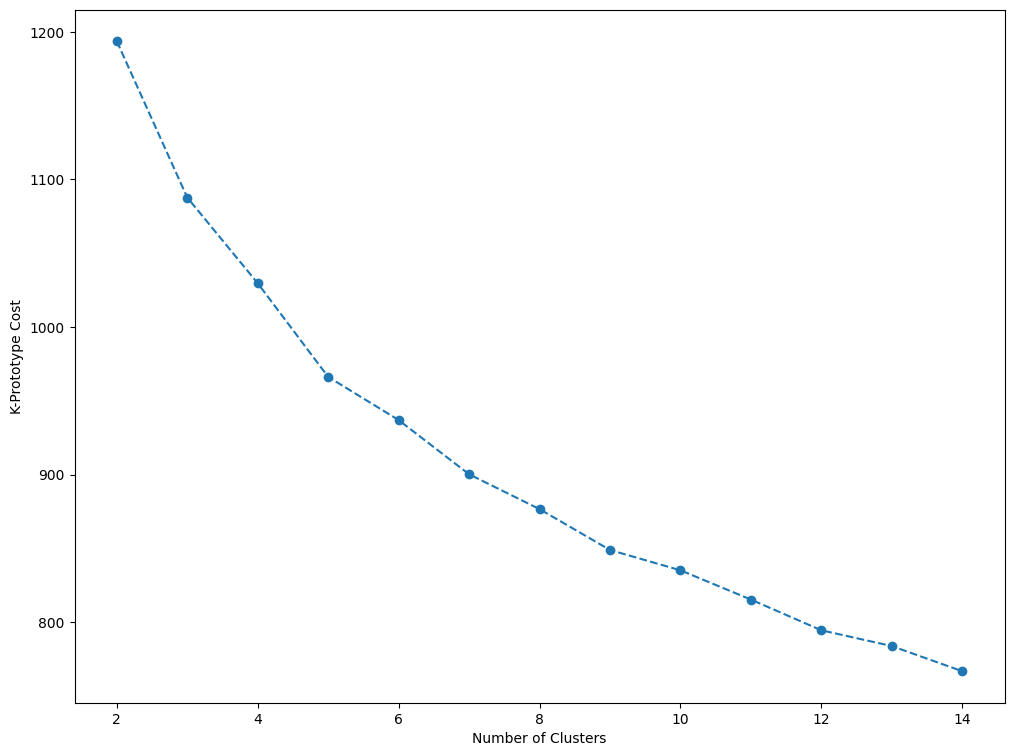

In [175]:
#Ploting Cost 
plt.figure(figsize=(12, 9))
plt.plot(n_clusters, costs, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-Prototype Cost')
plt.show()

2


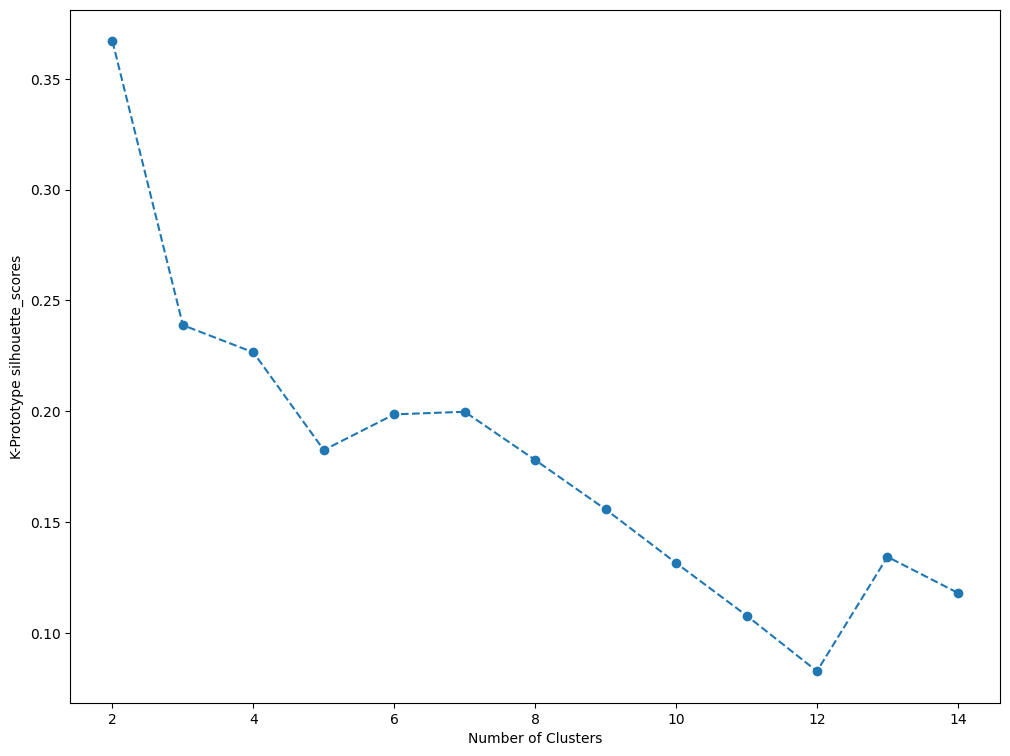

In [176]:
#plotting the optimal using sillhouette
optimal_n_clusters = n_clusters[np.argmax(silhouette_scores)]

print (optimal_n_clusters)

#Ploting Cost 
plt.figure(figsize=(12, 9))
plt.plot(n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-Prototype silhouette_scores')
plt.show()



In [177]:
categorical_columns = [4,5]
kp = KPrototypes(n_clusters=7, init='cao', n_init=2, verbose=0, random_state= 42 )
clusters = kp.fit_predict(y_final, categorical=categorical_columns)


In [178]:
y_final_unscaled.head()

,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter,next_accom_region,next_accom_type
0,1.0,896201.625996,8.434579,12.00000,Jawa Timur,HOMESTAY
1,2.0,513298.441428,8.420212,16.00000,Jawa Barat,HOTEL
2,2.0,294486.253722,8.831921,24.99785,Trang,HOTEL
3,2.0,437789.420298,8.572257,16.00000,Jawa Timur,HOTEL
4,2.0,212348.750150,8.017347,16.00000,Chonburi,GUESTHOUSE


In [179]:
y_final_unscaled["dependent"] = pd.DataFrame(clusters,columns = ["dependent"])
y_final_unscaled["next_accom_id"] = y_grouped["next_accom_id"]

Descriptive for custer

In [180]:
### adding cluster into the dataframe 
df = pd.merge(df[x],y_final_unscaled[['next_accom_id','dependent']],on='next_accom_id', how='left')
df = df.dropna(axis = 0,subset = ["dependent"] )
df_copy = df 

###Clustr Descriptive

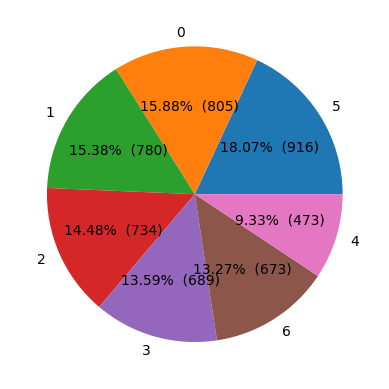

In [181]:
#Descriptive for Cluster 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

test = y_final_unscaled["dependent"].value_counts()
plt.pie(test, labels = test.index,
        autopct=make_autopct(y_final_unscaled["dependent"].value_counts().values.tolist()))


plt.show()


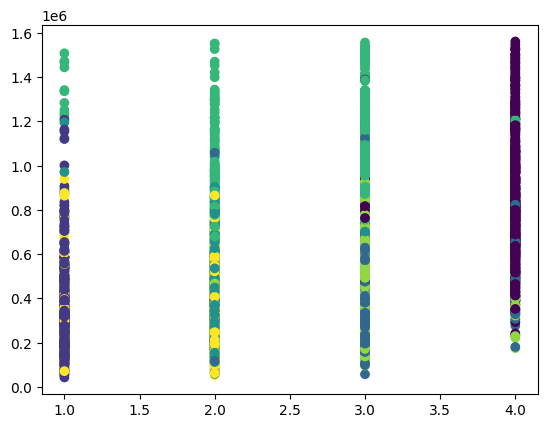

In [182]:
plt.scatter(y_final_unscaled["next_accom_star_rating"],y_final_unscaled["next_selling_price"], c = y_final_unscaled["dependent"]) 

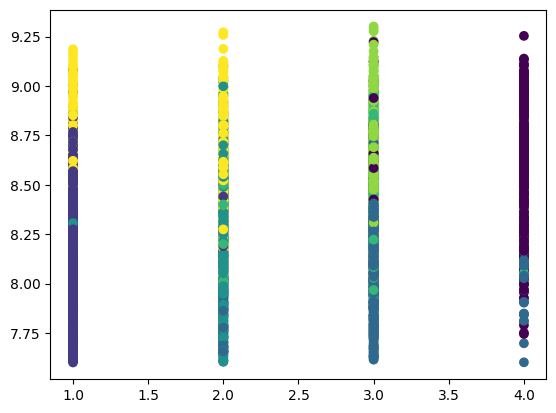

In [183]:
plt.scatter(y_final_unscaled["next_accom_star_rating"],y_final_unscaled["next_hotel_score"], c = y_final_unscaled["dependent"]) 

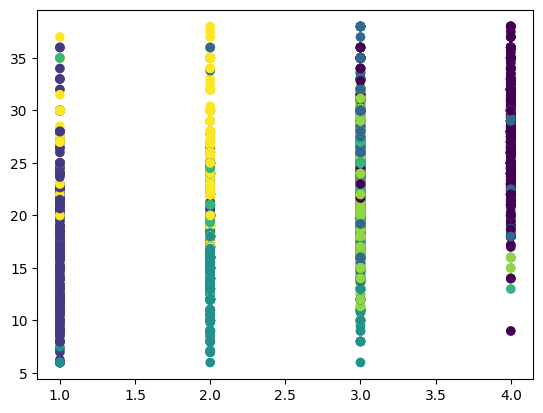

In [184]:
plt.scatter(y_final_unscaled["next_accom_star_rating"],y_final_unscaled["next_room_size_inmeter"], c = y_final_unscaled["dependent"]) 

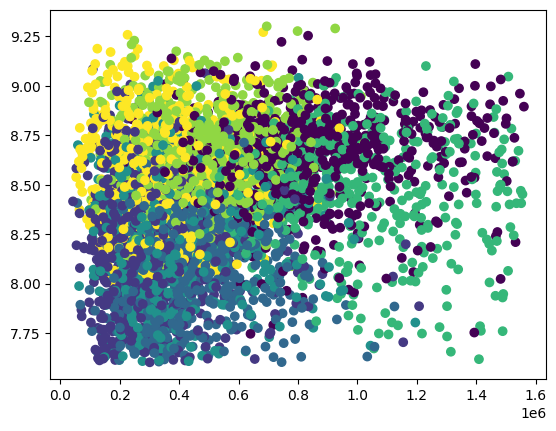

In [185]:
plt.scatter(y_final_unscaled["next_selling_price"],y_final_unscaled["next_hotel_score"], c = y_final_unscaled["dependent"]) 

In [186]:
print("Next Selling Price")


characteristic = pd.DataFrame()
next_sell_price = y_final_unscaled.groupby(by = "dependent",as_index = False)["next_selling_price"].mean()
next_accom_star_rating = y_final_unscaled.groupby(by = "dependent",as_index = False)["next_accom_star_rating"].mean()
hotel_score = y_final_unscaled.groupby(by = "dependent",as_index = False)["next_hotel_score"].mean()
next_room_size_inmeter = y_final_unscaled.groupby(by = "dependent",as_index = False)["next_room_size_inmeter"].mean()


def group_mode(group):
    return group.mode()

# Apply the group_mode function using groupby
next_accom_region = y_final_unscaled.groupby('dependent',as_index = False)['next_accom_region'].apply(group_mode)
next_accom_type = y_final_unscaled.groupby('dependent',as_index = False)['next_accom_type'].apply(group_mode)




char_1 = pd.concat([characteristic, next_sell_price])

char_2 = pd.merge(char_1,next_accom_star_rating,on='dependent', how='left')
char_3 = pd.merge(char_2,hotel_score,on='dependent', how='left')
char_4 = pd.merge(char_3,next_room_size_inmeter,on='dependent', how='left')
char_5 = pd.merge(char_4,next_accom_region,on='dependent', how='left')
char_6 = pd.merge(char_5,next_accom_type,on='dependent', how='left')


char_6.rename(columns={"0_x" : "next_accom_region",
                       "0_y" : "next_accom_type"})

Next Selling Price


,dependent,next_selling_price,next_accom_star_rating,next_hotel_score,next_room_size_inmeter,next_accom_region,next_accom_type
0,0,820351.638049,3.903106,8.642622,27.613832,Jawa Barat,HOTEL
1,1,305853.925813,1.091026,8.214953,18.857403,Jakarta,HOTEL
2,2,436816.699361,2.970027,8.135672,24.078416,Bali,HOTEL
3,3,395525.759401,2.052250,8.283336,15.249448,Jawa Timur,HOTEL
4,4,973154.060708,2.699789,8.476789,22.005406,Jakarta,HOTEL
5,5,482512.246155,3.010917,8.646056,22.263839,Bangkok,HOTEL
6,6,361011.277308,1.851412,8.578281,24.159547,Bali,HOTEL


### Classification Modeling

In [187]:
#defining X 
X = ["selling_price_idr","gbv_idr","accom_region","accom_star_rating","num_rooms","accom_type","bed_type","room_size_inmeter","hotel_score"]
df_x =df[X]

accom_region_get_dummies  = pd.get_dummies(df_x["accom_region"],drop_first = True,prefix = "accom_region")
accom_type_get_dummies  = pd.get_dummies(df_x["accom_type"],drop_first = True,prefix = "accom_type")
bed_type_get_dummies  = pd.get_dummies(df_x["bed_type"],drop_first = True,prefix = "bed_type")

df_x = df_x.drop(['accom_region',"accom_type","bed_type"],axis = 1)

df_x = df_x.join(accom_region_get_dummies)
df_x = df_x.join(accom_type_get_dummies)
df_x = df_x.join(bed_type_get_dummies)
df_x


#defining Y 

y = ["dependent"]
df_y = df[y]

In [188]:
X_train, X_test, y_train,y_test= train_test_split(df_x,df_y, test_size = 0.2 , random_state = 42, stratify = df_y )


In [189]:
rfc = RandomForestClassifier(random_state = 42 )
#fit to model 
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)


<ipython-input-189-e7a12b4feb64>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


0.296932928884395

In [190]:
#cross validation
cross_val_score(rfc, X_train, y_train, cv=10).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.3027655560306922

In [191]:
#grid_search

n_estimators = [1,5]
max_depth = [20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)


grid = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=2,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best: 0.276972 using {'max_depth': 20, 'n_estimators': 5}
0.267111 (0.002444) with: {'max_depth': 20, 'n_estimators': 1}
0.276972 (0.000506) with: {'max_depth': 20, 'n_estimators': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [192]:
#Accuracy
best_model_rfc = grid_result.best_estimator_
accuracy = cross_val_score(best_model_rfc, X_train, y_train, cv=5).mean()
precision = cross_val_score(best_model_rfc, X_train, y_train, cv=5, scoring='precision_macro').mean()
recall = cross_val_score(best_model_rfc, X_train, y_train, cv=5, scoring='recall_macro').mean()
f1 = cross_val_score(best_model_rfc, X_train, y_train, cv=5, scoring='f1_macro').mean()





/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [193]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.2863292706239176
Precision: 0.2678037676637498
Recall: 0.25559398083539187
F1 Score: 0.2557778401711427


#### XGBoost


In [198]:
import xgboost as xgb


params = {
    'objective': 'multi:softmax', # multiclass classification
    'num_class': 3, # number of classes
    # 'max_depth': 3,
    # 'eta': 0.3,
    # 'subsample': 0.7,
    # 'colsample_bytree': 0.7,
    # 'eval_metric': 'mlogloss' # multi-class log loss
    'missing': None,
    'seed': 42,
    "early_stopping_rounds": 10,
    "eval_metrics": "accuracy"
}

# num_rounds = 10
# model = xgb.train(params, X_train, num_rounds)
# preds = model.predict(dtest)

model = xgb.XGBClassifier(params)
model.fit(X_train,
          y_train,
          verbose=True,
          eval_set=[(X_test, y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	validation_0-mlogloss:1.86221
[1]	validation_0-mlogloss:1.81135
[2]	validation_0-mlogloss:1.77728
[3]	validation_0-mlogloss:1.75480
[4]	validation_0-mlogloss:1.73718
[5]	validation_0-mlogloss:1.72605
[6]	validation_0-mlogloss:1.71752
[7]	validation_0-mlogloss:1.71241
[8]	validation_0-mlogloss:1.70688
[9]	validation_0-mlogloss:1.70369
[10]	validation_0-mlogloss:1.70191
[11]	validation_0-mlogloss:1.69882
[12]	validation_0-mlogloss:1.69838
[13]	validation_0-mlogloss:1.69738
[14]	validation_0-mlogloss:1.69704
[15]	validation_0-mlogloss:1.69600
[16]	validation_0-mlogloss:1.69556
[17]	validation_0-mlogloss:1.69610
[18]	validation_0-mlogloss:1.69518
[19]	validation_0-mlogloss:1.69547
[20]	validation_0-mlogloss:1.69580
[21]	validation_0-mlogloss:1.69548
[22]	validation_0-mlogloss:1.69570
[23]	validation_0-mlogloss:1.69524
[24]	validation_0-mlogloss:1.69490
[25]	validation_0-mlogloss:1.69452
[26]	validation_0-mlogloss:1.69451
[27]	validation_0-mlogloss:1.69516
[28]	validation_0-mlogloss:1.6

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)